## Dataset  and Projectinformation


Referene:https://archive.ics.uci.edu/ml/datasets/dresses_attribute_sales

## Import functions

In [1246]:
#Importing required modules
import numpy as np 
import pandas as pd 
import seaborn as sns; sns.set()

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import sklearn
assert sklearn.__version__ >= "0.2"
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

import os
import warnings
warnings.filterwarnings('ignore')

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    

pd.set_option("display.max.columns", None, "display.float_format", lambda x: '%.2f' % x)

## Data Exploration


In [1247]:
# load data and display first 6 rows
dataset = 'C:/Users/poope/Documents/Jupyter Notebook\Machine-Learning-I/Attribute DataSet.xlsx'

df = pd.read_excel(dataset, header = 0)
df.head(6)

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.60,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.00,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.00,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.60,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.50,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0
5,1068332458,bohemian,Low,0.00,M,Summer,v-neck,sleevless,empire,NaN,NaN,NaN,print,0


In [1248]:
# Display information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    object 
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   waiseline       413 non-null    object 
 9   Material        372 non-null    object 
 10  FabricType      234 non-null    object 
 11  Decoration      264 non-null    object 
 12  Pattern Type    391 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


In [1249]:
# Summarize data
df.describe()
print('summary shows only columns with intger and float type')

summary shows only columns with intger and float type


In [1250]:
# Define all missing values
df.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
FabricType        266
Decoration        236
Pattern Type      109
Recommendation      0
dtype: int64

* There are 500 instances and 14 features in this original data set.
* 1 column with float type, 2 columns with integer type and 11 columns with text type.
* Price shows 2 missing values, Season shows 2 missing values, NeckLine shows 3 missing values, SleeveLenght shows 2 missing values, waiseline shows 87 missing values, Material shows 128 missing values, FabricaType shows 266 missing values, Decoartion shows 236 missing values, and Pattern Type shows 109 missing values.

#### Define Missing Values

In [1251]:
# Define rows with missing values on Price column
price_missing = df['Price'].isna()
df.loc[price_missing,:]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
262,662727740,party,NaN,4.80,free,Winter,o-neck,sleevless,empire,NaN,NaN,embroidary,NaN,1
263,1090993173,party,NaN,4.50,L,Summer,NaN,full,NaN,NaN,NaN,NaN,NaN,1


In [1252]:
# Define rows with missing values on Season column
season_missing = df['Season'].isna()
df.loc[season_missing,:]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
186,929797706,Casual,Low,0.00,free,NaN,o-neck,full,natural,cotton,NaN,NaN,patchwork,0
270,751364623,party,Average,4.80,L,NaN,Sweetheart,sleevless,empire,NaN,NaN,pleat,NaN,1


In [1253]:
# Define rows with missing values on NeckLine column
neckline_missing = df['NeckLine'].isna()
df.loc[neckline_missing,:]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
263,1090993173,party,NaN,4.50,L,Summer,NaN,full,NaN,NaN,NaN,NaN,NaN,1
329,858212832,cute,Average,4.30,M,Summer,NaN,NaN,natural,cotton,chiffon,NaN,solid,0
384,855418066,Casual,Low,4.70,L,Summer,NaN,sleevless,NaN,cotton,NaN,NaN,solid,1


In [1254]:
season_missing = df['Season'].isna()
df.loc[season_missing,:]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
186,929797706,Casual,Low,0.00,free,NaN,o-neck,full,natural,cotton,NaN,NaN,patchwork,0
270,751364623,party,Average,4.80,L,NaN,Sweetheart,sleevless,empire,NaN,NaN,pleat,NaN,1


In [1255]:
# Define rows with missing values on SleeveLength column
sleeveLength_missing = df['SleeveLength'].isna()
df.loc[sleeveLength_missing,:]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
329,858212832,cute,Average,4.30,M,Summer,NaN,NaN,natural,cotton,chiffon,NaN,solid,0
441,1055149353,Sexy,Low,0.00,free,winter,v-neck,NaN,dropped,cotton,NaN,lace,NaN,1


In [1256]:
# Define rows with missing values on waiseline column
waiseline_missing = df['waiseline'].isna()
df.loc[waiseline_missing,:]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
6,1220707172,Casual,Average,0.00,XL,Summer,o-neck,full,NaN,cotton,NaN,NaN,solid,0
11,898481530,Flare,Average,0.00,free,Spring,v-neck,short,NaN,nylon,NaN,NaN,animal,0
12,957723897,sexy,Low,4.70,M,Winter,o-neck,threequarter,NaN,NaN,chiffon,lace,print,1
14,1055411544,Casual,Low,5.00,M,Summer,boat-neck,short,NaN,cotton,NaN,sashes,solid,0
15,1162628131,Casual,Low,0.00,free,Winter,boat-neck,full,NaN,other,other,lace,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,1253973206,cute,Low,0.00,M,Summer,boat-neck,short,NaN,NaN,chiffon,sashes,NaN,0
465,828790972,party,Average,4.90,M,winter,o-neck,halfsleeve,NaN,cotton,NaN,lace,NaN,1
466,933413410,Casual,Average,4.80,M,Summer,o-neck,halfsleeve,NaN,NaN,NaN,NaN,NaN,0
470,1124754999,Sexy,Average,0.00,S,Summer,v-neck,sleevless,NaN,NaN,NaN,NaN,NaN,1


In [1257]:
# Define rows with missing values on Material column
material_missing = df['Material'].isna()
df.loc[material_missing,:]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.60,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
5,1068332458,bohemian,Low,0.00,M,Summer,v-neck,sleevless,empire,NaN,NaN,NaN,print,0
12,957723897,sexy,Low,4.70,M,Winter,o-neck,threequarter,NaN,NaN,chiffon,lace,print,1
17,830467746,bohemian,Medium,5.00,free,Automn,o-neck,full,natural,NaN,NaN,hollowout,patchwork,1
21,856178100,Casual,Low,4.30,M,Summer,o-neck,sleevless,natural,NaN,chiffon,NaN,solid,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,933413410,Casual,Average,4.80,M,Summer,o-neck,halfsleeve,NaN,NaN,NaN,NaN,NaN,0
470,1124754999,Sexy,Average,0.00,S,Summer,v-neck,sleevless,NaN,NaN,NaN,NaN,NaN,1
471,832949213,Casual,Low,4.40,free,Summer,o-neck,sleevless,NaN,NaN,NaN,NaN,animal,0
473,929898500,work,Average,4.80,M,winter,turndowncollor,full,natural,NaN,NaN,NaN,solid,0


In [1258]:
# Define rows with missing values on FabricType column
fabricType_missing = df['FabricType'].isna()
df.loc[fabricType_missing,:]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
1,1212192089,Casual,Low,0.00,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.00,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
5,1068332458,bohemian,Low,0.00,M,Summer,v-neck,sleevless,empire,NaN,NaN,NaN,print,0
6,1220707172,Casual,Average,0.00,XL,Summer,o-neck,full,NaN,cotton,NaN,NaN,solid,0
11,898481530,Flare,Average,0.00,free,Spring,v-neck,short,NaN,nylon,NaN,NaN,animal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,1190558632,cute,Average,0.00,L,Summer,o-neck,sleevless,empire,cotton,NaN,lace,solid,1
491,964917582,Casual,Average,5.00,L,Summer,o-neck,sleevless,natural,cotton,NaN,NaN,NaN,1
495,713391965,Casual,Low,4.70,M,Spring,o-neck,full,natural,polyster,NaN,NaN,solid,1
496,722565148,Sexy,Low,4.30,free,Summer,o-neck,full,empire,cotton,NaN,NaN,NaN,0


In [1259]:
# Define rows with missing values on Decoration column
decoration_missing = df['Decoration'].isna()
df.loc[decoration_missing,:]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
2,1190380701,vintage,High,0.00,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
5,1068332458,bohemian,Low,0.00,M,Summer,v-neck,sleevless,empire,NaN,NaN,NaN,print,0
6,1220707172,Casual,Average,0.00,XL,Summer,o-neck,full,NaN,cotton,NaN,NaN,solid,0
9,985292672,bohemian,Low,0.00,free,Summer,v-neck,sleevless,natural,nylon,chiffon,NaN,NaN,1
11,898481530,Flare,Average,0.00,free,Spring,v-neck,short,NaN,nylon,NaN,NaN,animal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,964917582,Casual,Average,5.00,L,Summer,o-neck,sleevless,natural,cotton,NaN,NaN,NaN,1
492,859922576,cute,Average,4.60,M,Spring,o-neck,halfsleeve,natural,acrylic,chiffon,NaN,NaN,0
494,990559192,Brief,Average,4.70,M,winter,o-neck,halfsleeve,natural,acrylic,chiffon,NaN,striped,0
495,713391965,Casual,Low,4.70,M,Spring,o-neck,full,natural,polyster,NaN,NaN,solid,1


In [1260]:
# Define rows with missing values on Pattern Type column
patternType_missing = df['Pattern Type'].isna()
df.loc[patternType_missing,:]

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
7,1219677488,Novelty,Average,0.00,free,Automn,o-neck,short,natural,polyster,broadcloth,lace,NaN,0
9,985292672,bohemian,Low,0.00,free,Summer,v-neck,sleevless,natural,nylon,chiffon,NaN,NaN,1
15,1162628131,Casual,Low,0.00,free,Winter,boat-neck,full,NaN,other,other,lace,NaN,0
19,1113221101,Sexy,Average,5.00,M,Automn,o-neck,sleevless,empire,milksilk,NaN,NaN,NaN,1
79,943188872,bohemian,very-high,4.70,free,Winter,v-neck,sleevless,NaN,polyster,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,933413410,Casual,Average,4.80,M,Summer,o-neck,halfsleeve,NaN,NaN,NaN,NaN,NaN,0
470,1124754999,Sexy,Average,0.00,S,Summer,v-neck,sleevless,NaN,NaN,NaN,NaN,NaN,1
491,964917582,Casual,Average,5.00,L,Summer,o-neck,sleevless,natural,cotton,NaN,NaN,NaN,1
492,859922576,cute,Average,4.60,M,Spring,o-neck,halfsleeve,natural,acrylic,chiffon,NaN,NaN,0


## Data Cleanup

In [1261]:
# Make a copy of the data set 
df1 = df
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    object 
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   waiseline       413 non-null    object 
 9   Material        372 non-null    object 
 10  FabricType      234 non-null    object 
 11  Decoration      264 non-null    object 
 12  Pattern Type    391 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


In [1262]:
# Define typo, null, and duplicate values, then replace catergorical values with assigned numerical values

df1['Price'].replace(['Low', 'low', 'Average', 'Medium' ,'High', 'high', 'very-high'],
                     [1, 1,  2, 3, 4, 4, 5], inplace=True)

df1['Style'].replace(['Sexy', 'sexy', 'Casual', 'vintage', 'Brief', 'cute', 'bohemian', 'Novelty', 'Flare', 'party', 'work', 'OL', 'fashion'],
                     [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

df1['Size'].replace(['S', 'small', 'M', 'L', 'XL','free'], 
                    [1, 1, 2, 3, 4, 5], inplace=True)

df1['Season'].replace(['Summer', 'Automn', 'Automn', 'Autumn', 'Spring', 'Winter', 'winter'], 
                      [1, 2, 2, 2, 3, 4, 4], inplace=True)

df1['NeckLine'].replace(['backless' ,'boat-neck', 'bowneck', 'halter' ,'mandarin-collor' ,'o-neck' ,'open' ,'peterpan-collor' ,'ruffled' ,'Scoop' ,'slash-neck' ,'sqare-collor' ,'Sweetheart' ,'turndowncollor' ,'v-neck'], 
                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], inplace=True)

df1['SleeveLength'].replace(['sleevless', 'sleveless', 'sleeveless', 'sleeevless','Petal', 'full', 'butterfly', 'short', 'threequarter', 'threequater', 'thressqatar', 'halfsleeve', 'cap-sleeves', 'capsleeves', 'turndowncollor', 'half', 'urndowncollor', 'Petal', 'full', 'butterfly', 'short'], 
                            [1, 1, 1, 1,  2, 3, 4, 5, 6, 6, 6, 7, 8, 8, 9, 10, 11, 12, 13, 14, 15], inplace=True)

df1['waiseline'].replace(['empire', 'natural', 'pricess', 'dropped'], 
                         [1, 2, 3, 4], inplace=True)

df1['Material'].replace(['acrylic', 'cashmere', 'chiffonfabric', 'cotton', 'knitting', 'lace', 'linen', 'lycra', 'microfiber', 'milksilk', 'mix', 'modal', 'model', 'nylon', 'other', 'polyster', 'rayon', 'shiffon', 'silk', 'sill', 'spandex', 'viscos', 'wool'], 
                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 13, 14, 15, 16, 17, 18, 18, 19, 20, 21], inplace=True)

df1['FabricType'].replace(['batik', 'broadcloth', 'chiffon', 'Corduroy', 'dobby', 'flannael', 'flannel', 'jersey', 'knitted', 'knitting', 'lace', 'organza', 'other', 'poplin', 'satin', 'sattin', 'shiffon', 'terry', 'tulle', 'wollen', 'woolen', 'worsted'], 
                          [1 ,2 ,3 ,4 ,5 ,6 ,6 ,7 ,8 ,8 ,9 ,10 ,11 ,12 ,13 ,13 ,14 ,15 ,16 ,17 ,17 ,18], inplace=True)

df1['Decoration'].replace(['ruffles', 'applique', 'beading', 'bow', 'button', 'cascading', 'crystal', 'draped', 'embroidary', 'feathers', 'flowers', 'hollowout', 'lace', 'pearls', 'plain', 'pleat', 'pockets', 'rivet', 'ruched', 'sashes', 'sequined', 'tassel', 'Tiered', 'none'], 
                          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], inplace=True)

df1['Pattern Type'].replace(['animal', 'character', 'dot', 'floral', 'geometric', 'leapord', 'leopard', 'patchwork', 'plaid', 'print', 'solid', 'splice', 'striped'],
                              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace=True)
df1

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,1,1.00,4.60,2,1,6,1.00,1,NaN,3.00,1.00,1,1
1,1212192089,2,1.00,0.00,3,1,6,2.00,2,9.00,NaN,1.00,1,0
2,1190380701,3,4.00,0.00,3,2,6,3.00,2,15.00,NaN,NaN,10,0
3,966005983,4,2.00,4.60,3,3,6,3.00,2,18.00,3.00,9.00,10,1
4,876339541,5,1.00,4.50,2,1,6,4.00,2,3.00,3.00,4.00,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,713391965,2,1.00,4.70,2,3,6,3.00,2,15.00,NaN,NaN,11,1
496,722565148,1,1.00,4.30,5,1,6,3.00,1,4.00,NaN,NaN,NaN,0
497,532874347,2,2.00,4.70,2,1,15,3.00,1,4.00,NaN,13.00,11,1
498,655464934,2,2.00,4.60,3,4,2,1.00,1,18.00,2.00,2.00,10,1


In [1263]:
# Drop null values from all features
df2 = df1.dropna(how = 'any')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 3 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        99 non-null     int64  
 1   Style           99 non-null     int64  
 2   Price           99 non-null     float64
 3   Rating          99 non-null     float64
 4   Size            99 non-null     object 
 5   Season          99 non-null     object 
 6   NeckLine        99 non-null     object 
 7   SleeveLength    99 non-null     float64
 8   waiseline       99 non-null     object 
 9   Material        99 non-null     float64
 10  FabricType      99 non-null     float64
 11  Decoration      99 non-null     float64
 12  Pattern Type    99 non-null     object 
 13  Recommendation  99 non-null     int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 11.6+ KB


After dropping NaN, null, zero, and none values, there are 99 instances and 14 columns left

In [1264]:
# Copy the data set and convert all text into integer and float
df3 = df2.convert_dtypes(infer_objects=True)
# convert vector target's float type to integer
df3['Rating'] = df['Rating'].astype(int)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 3 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Dress_ID        99 non-null     Int64
 1   Style           99 non-null     Int64
 2   Price           99 non-null     Int64
 3   Rating          99 non-null     int32
 4   Size            99 non-null     Int64
 5   Season          99 non-null     Int64
 6   NeckLine        99 non-null     Int64
 7   SleeveLength    99 non-null     Int64
 8   waiseline       99 non-null     Int64
 9   Material        99 non-null     Int64
 10  FabricType      99 non-null     Int64
 11  Decoration      99 non-null     Int64
 12  Pattern Type    99 non-null     Int64
 13  Recommendation  99 non-null     Int64
dtypes: Int64(13), int32(1)
memory usage: 12.5 KB


In [1265]:
# Drop Dress_ID column since it is not used for analysis, then show summary
df3.drop(columns='Dress_ID', inplace=True)
df3.describe()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
count,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
mean,3.40,1.69,3.11,3.52,2.59,8.82,3.23,1.80,11.26,6.02,11.07,9.81,0.40
std,2.25,0.69,1.80,1.38,1.18,4.20,2.17,0.40,5.85,5.65,7.26,2.63,0.49
min,1.00,1.00,0.00,1.00,1.00,2.00,1.00,1.00,3.00,2.00,1.00,1.00,0.00
25%,2.00,1.00,3.50,2.00,1.00,6.00,1.00,2.00,4.00,3.00,3.00,10.00,0.00
50%,2.00,2.00,4.00,3.00,3.00,6.00,3.00,2.00,15.00,3.00,12.00,11.00,0.00
75%,5.00,2.00,4.00,5.00,4.00,15.00,5.00,2.00,15.00,7.00,19.00,11.00,1.00
max,10.00,4.00,5.00,5.00,4.00,15.00,7.00,2.00,19.00,18.00,24.00,13.00,1.00


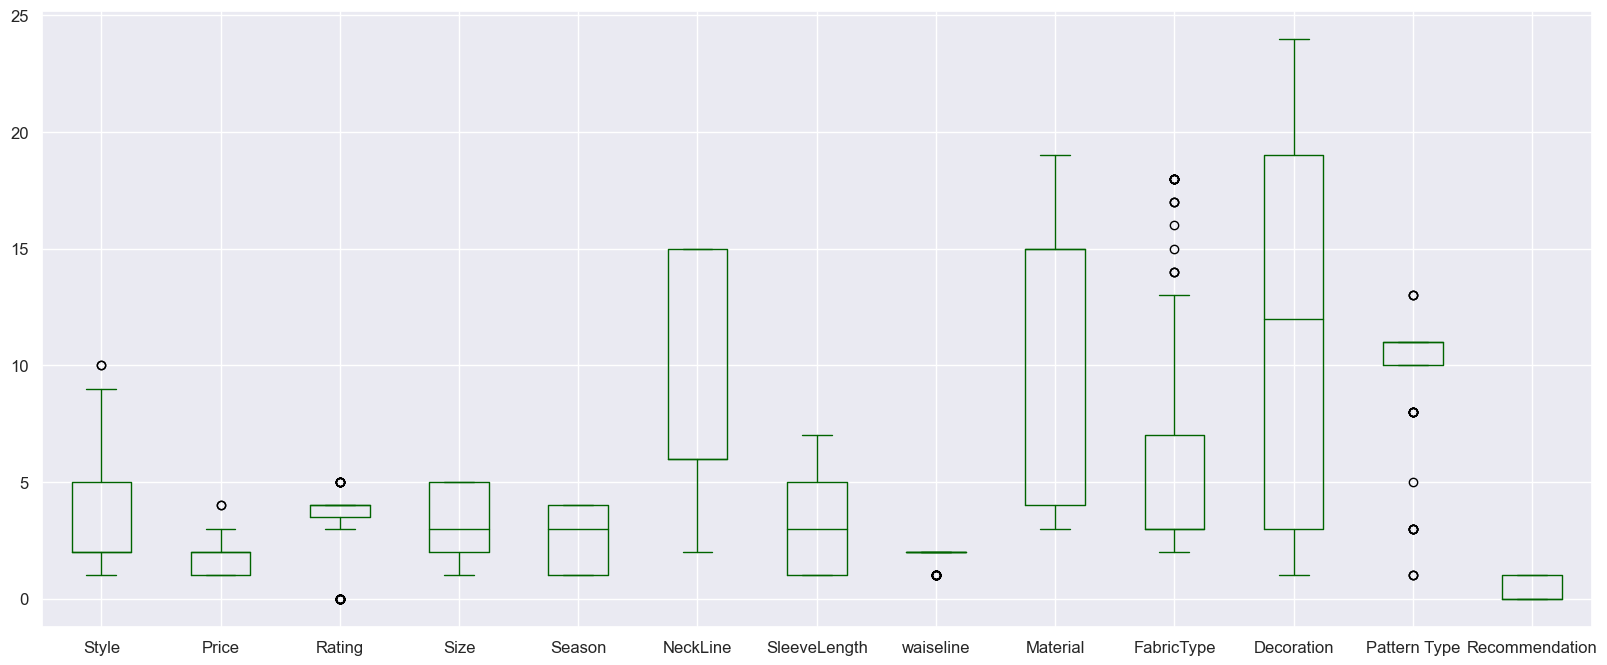

In [1266]:
# Display boxplot to define outliers
plt.figure(figsize=(20, 8))

df3 = pd.DataFrame(data = df3, columns = ['Style','Price','Rating','Size','Season','NeckLine','SleeveLength','waiseline','Material','FabricType','Decoration','Pattern Type','Recommendation'])
df3.boxplot(fontsize = 12, color='darkgreen')
fig.savefig('boxplopt.png', dpi=300)


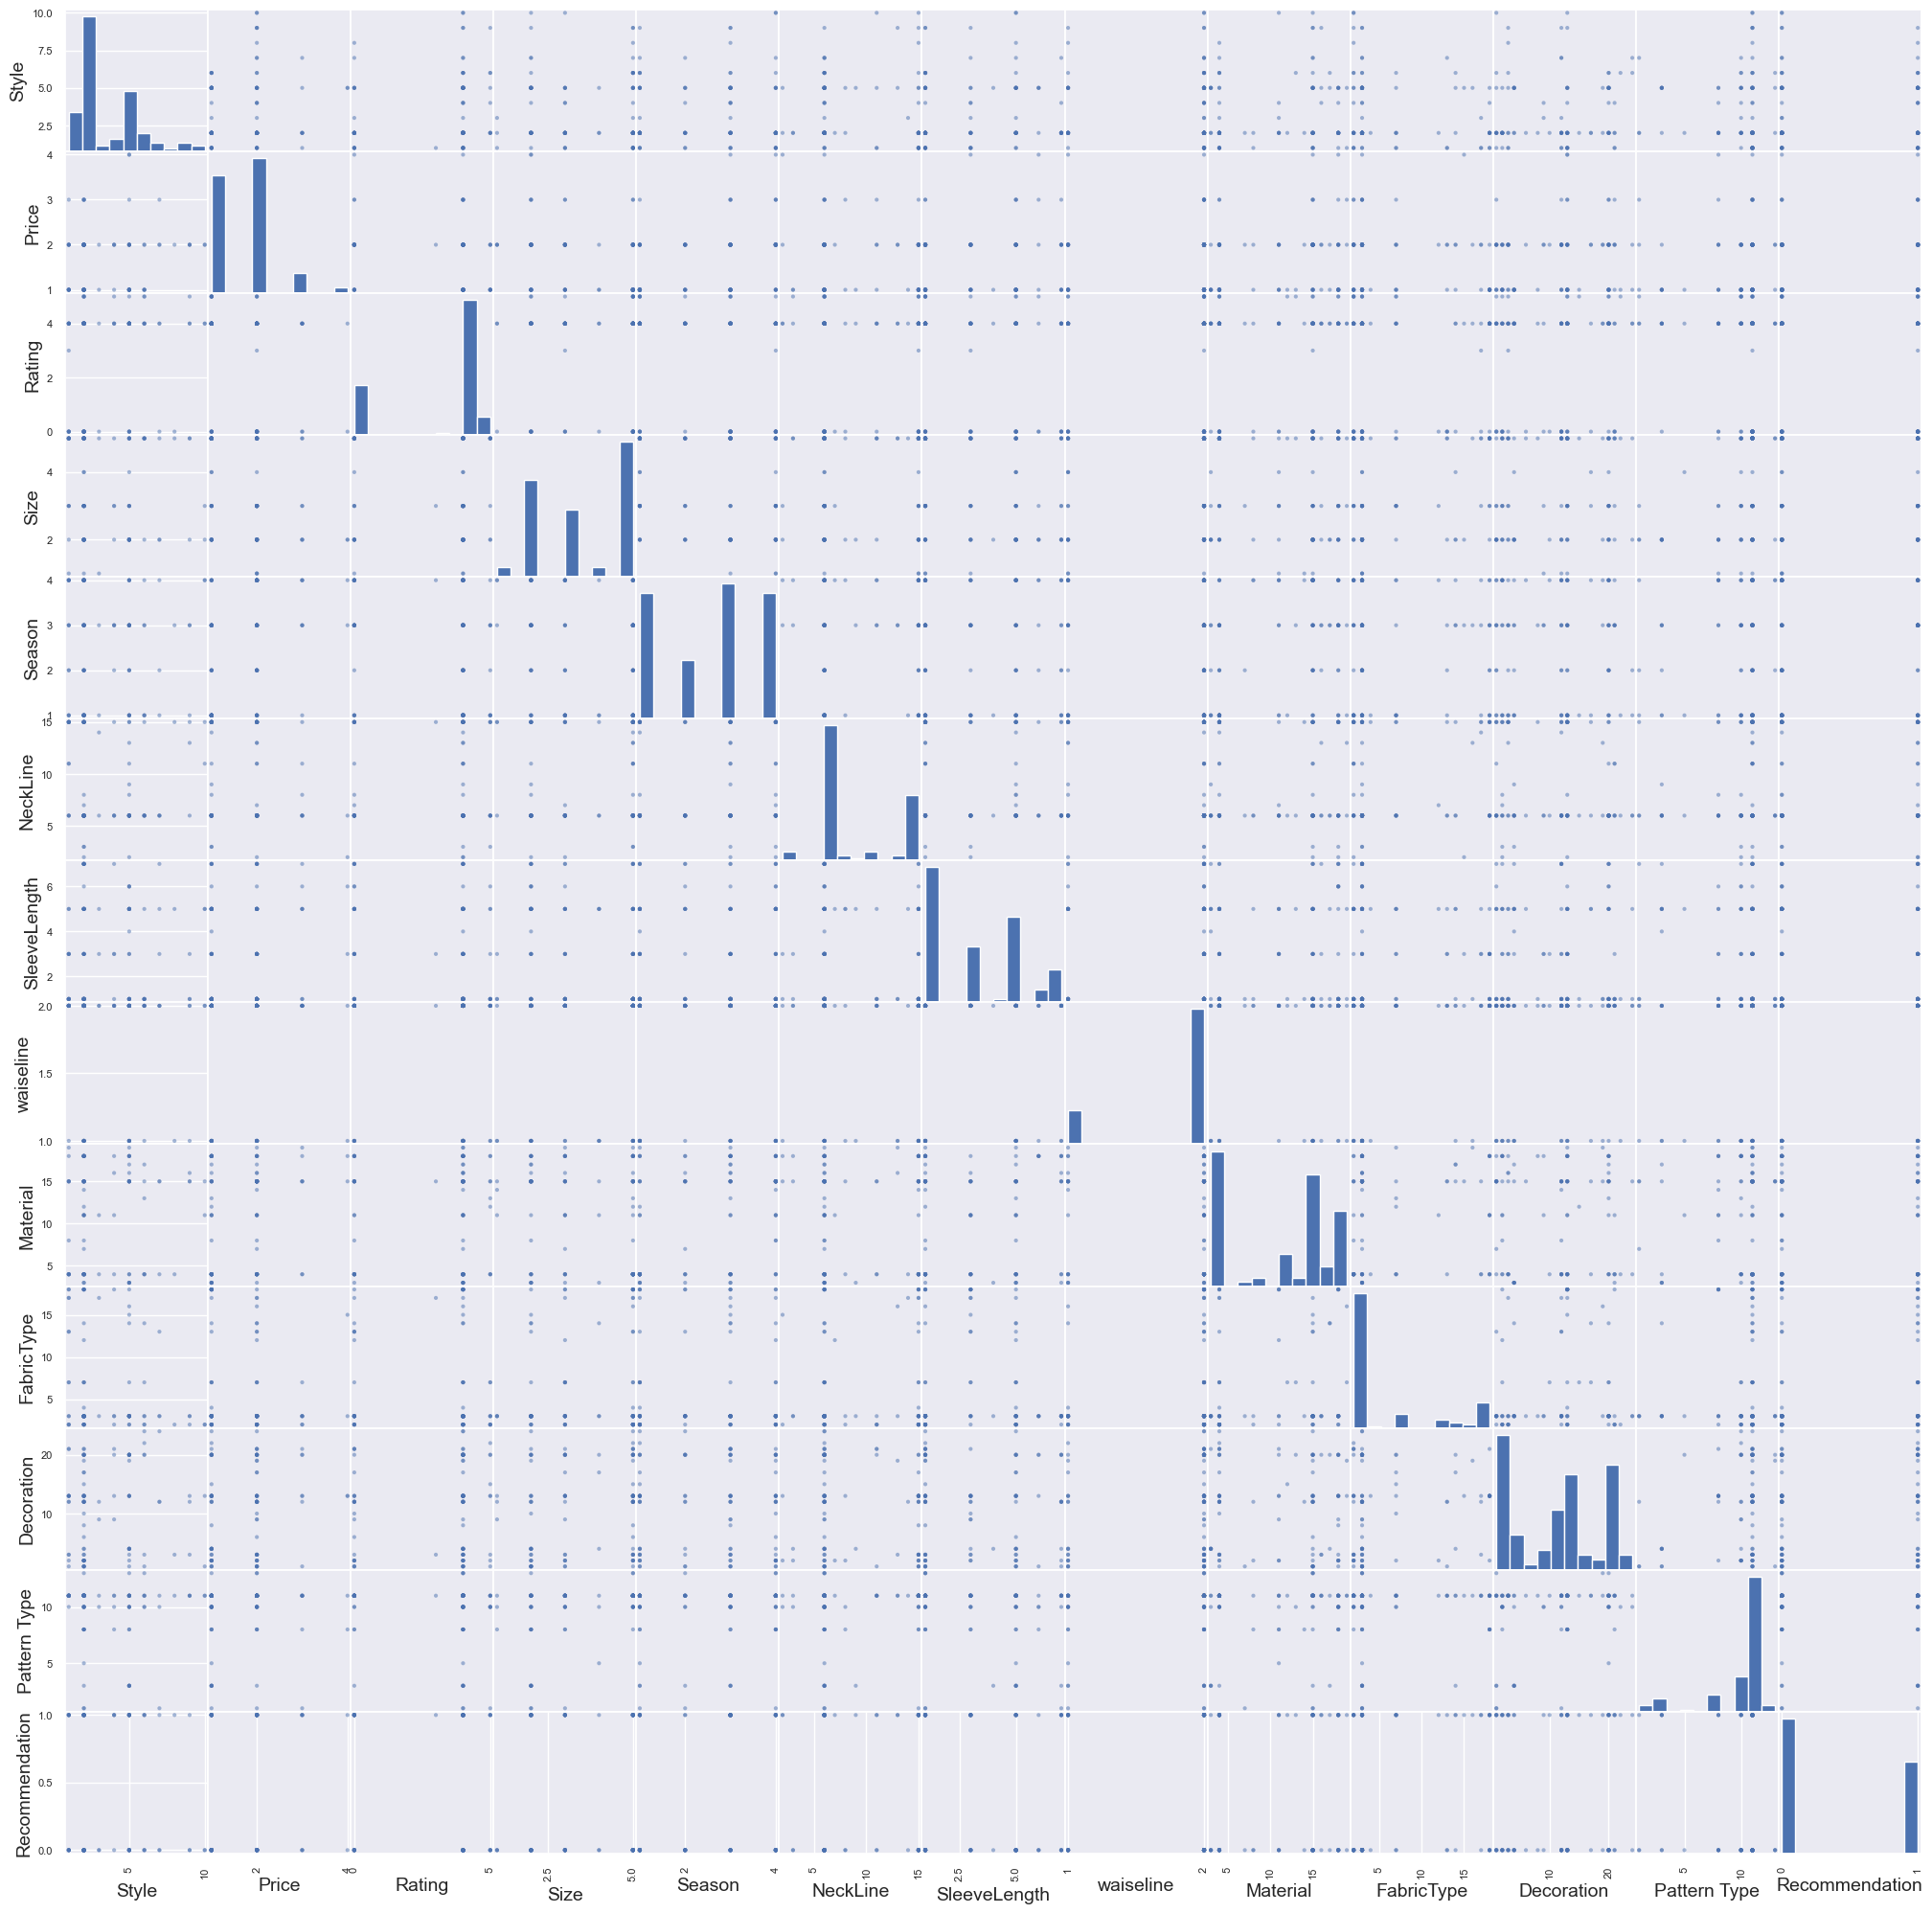

In [1267]:
# Using scatter_matrix() to show relationship between features
scatterData = ['Style','Price','Rating','Size','Season','NeckLine','SleeveLength','waiseline','Material','FabricType','Decoration','Pattern Type','Recommendation']
scatter_matrix(df3[scatterData],figsize=(25, 25))
fig.savefig('scatterMetrix.png', dpi = 300)
plt.show()

The result of Scatter Matrix shows no strong relations between the features.

## Prepare data for training

In [1268]:
df3.head(6)

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
3,4,2,4,3,3,6,3,2,18,3,9,10,1
4,5,1,4,2,1,6,4,2,3,3,4,3,0
8,8,2,0,5,3,15,5,1,4,2,3,11,1
10,9,2,5,5,1,6,3,2,15,2,13,11,0
28,5,1,4,5,2,6,1,2,15,3,20,13,0
29,5,1,4,2,3,9,5,1,3,3,4,3,1


In [1269]:
# confirm number of rows and columns
df3.shape

(99, 13)

In [1270]:
# convert x column to numpy array
X = df3.loc[:, ['Style','Price','Rating','Size','Season','NeckLine','SleeveLength','waiseline','Material','FabricType','Decoration','Pattern Type','Recommendation']].values
X.shape

(99, 13)

In [1271]:
# create target vector
y = df3.loc[:, 'Rating'].values
y.shape

(99,)

In [1272]:
# Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)  # split Train and test into 80/20

### Train and test data using Decision Tree Algorithm

In [1273]:
# Assign and call DecisionTreeClassifier module. Depth is set to 12.
clf = DecisionTreeClassifier(max_depth = 12, random_state = 0)

In [1274]:
# Train dataset
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=0)

In [1275]:
# Predict result using train data
clf.predict(X_train[0:100])

array([4, 4, 5, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 3, 4, 5, 4, 4, 4, 4,
       4, 0, 4, 5, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4,
       0, 4, 4, 4, 4, 0, 5, 4, 0, 4, 4, 4, 4, 0, 5, 4, 0, 4, 4, 0, 5, 4,
       4, 0, 4, 0, 4, 0, 4, 5, 4, 4, 5, 4, 4])

In [1276]:
# Predict result using test data
clf.predict(X_test[0:100])

array([4, 4, 0, 5, 4, 0, 0, 4, 4, 4, 0, 4, 4, 0, 0, 4, 0, 4, 4, 4])

In [1277]:
# Get score of train set
score = clf.score(X_train, y_train)
print('Decision Tree show accuracy score on train set at', score)

Decision Tree show accuracy score on train set at 1.0


In [1278]:
# Get score of train set
score = clf.score(X_test, y_test)
print('Decision Tree show accuracy score on test set at', score)

Decision Tree show accuracy score on test set at 1.0


In [1279]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 12))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    accuracy.append(score)

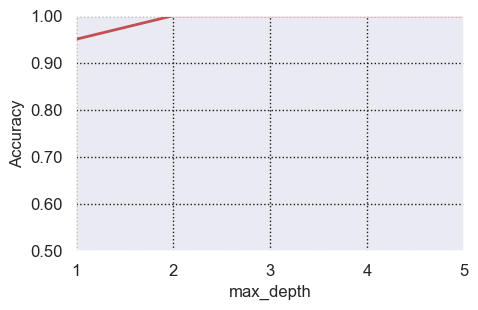

In [1280]:
# Display graph of accurcy and maximum depth
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 4));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='r')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 12)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 12)
ax.set_ylabel('Accuracy', fontsize = 12)
fig.savefig('accuracy_vs_maxDepth.png', dpi = 300)
fig.tight_layout()

#### Summary on training and testing data using Decision tree

Decison tree algorithm shows accuracy score of 1.0 in both training set and test set.

The accuracy produces best result in second depth

___

### Train and test data using Naive Bayes Algorithm

In [1281]:
# Assign and call Gaussian Naïve Bayes and train dataset
gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb.predict(X_train[0:100])

array([4, 4, 5, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 3, 4, 5, 4, 4, 4, 4,
       4, 0, 4, 5, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4,
       0, 4, 4, 4, 4, 0, 5, 4, 0, 4, 4, 4, 4, 0, 5, 4, 0, 4, 4, 0, 5, 4,
       4, 0, 4, 0, 4, 0, 4, 5, 4, 4, 5, 4, 4])

In [1282]:
# Predict result using train data
gnb.predict(X_train[0:100])

array([4, 4, 5, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 3, 4, 5, 4, 4, 4, 4,
       4, 0, 4, 5, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4,
       0, 4, 4, 4, 4, 0, 5, 4, 0, 4, 4, 4, 4, 0, 5, 4, 0, 4, 4, 0, 5, 4,
       4, 0, 4, 0, 4, 0, 4, 5, 4, 4, 5, 4, 4])

In [1283]:
# Predict result using test data
gnb.predict(X_test[0:100])

array([4, 4, 0, 5, 4, 0, 0, 4, 4, 4, 0, 4, 4, 0, 0, 4, 0, 4, 4, 4])

In [1284]:
# Get score value of train set
score_train = gnb.score(X_train,y_train)
print('Naive Bayes show accuracy score on train set at' , score_train)

Naive Bayes show accuracy score on train set at 1.0


In [1285]:
# Get score value of test set
score_test = gnb.score(X_test, y_test)
print('Naive Bayes show accuracy score on test set at', score_test)

Naive Bayes show accuracy score on test set at 1.0


#### Summary on training and testing data using Gaussian Naïve Bayes 

Gaussian Naïve Bayes algorithm shows accuracy score of 1.0 in both train set and test set.

## Conclusion

Either Decsiont tree algorithm or Gaussian Naïve Bayes algorithm is good to use for training the dataset, the prediction result will be able to get reasonably close to the optimal decision rule.


___